# Task 1.2 DataPreparation

In [1]:
import math
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

First of all, we upload the clean datasets obtained in the Data Understanding section.

In [2]:
df_incidents = pd.read_csv('../datasets_clean/incidents_clean.csv', sep=',', index_col=0)
df_poverty = pd.read_csv('../datasets_clean/poverty_clean.csv', sep=',', index_col=0)
df_elections = pd.read_csv('../datasets_clean/elections_clean.csv', sep=',', index_col=0)

In [3]:
df_incidents.describe()

,latitude,longitude,congressional_district,avg_age_participants,n_participants_child,n_participants_teen,n_participants_adult,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,year
count,174421.000000,174421.000000,164507.000000,174421.000000,174421.000000,174421.000000,174421.000000,174421.000000,174421.000000,174421.000000,174421.000000,174421.000000,174421.000000,174421.000000,174421.000000
mean,37.659729,-89.274100,7.965898,30.096783,0.024561,0.140465,1.542263,1.526152,0.220868,0.323361,0.543811,0.533777,0.423194,1.835157,2015.866547
std,5.108931,14.309482,8.426300,12.416426,0.189187,0.470008,1.090203,1.006156,0.501147,0.574439,0.753984,0.869459,0.857220,1.192104,1.190464
min,19.111400,-171.429000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2013.000000
25%,33.977300,-93.634200,2.000000,21.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2015.000000
50%,38.665300,-86.510500,5.000000,27.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2016.000000
75%,41.527700,-80.005700,10.000000,36.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2017.000000
max,71.336800,-67.271100,53.000000,100.000000,11.000000,27.000000,103.000000,61.000000,23.000000,50.000000,53.000000,63.000000,28.000000,103.000000,2018.000000


## Data casting
We cast the columns to proper datatypes.

In [4]:
# Let's see the types of the columns of the incidents dataset
df_incidents.dtypes

date                          object
state                         object
city_or_county                object
address                       object
latitude                     float64
longitude                    float64
congressional_district       float64
avg_age_participants         float64
n_participants_child         float64
n_participants_teen          float64
n_participants_adult         float64
n_males                      float64
n_females                    float64
n_killed                       int64
n_injured                      int64
n_arrested                   float64
n_unharmed                   float64
n_participants               float64
incident_characteristics1     object
year                         float64
dtype: object

In [5]:
df_incidents['date'] = pd.to_datetime(df_incidents['date'])
df_incidents['state'] = df_incidents['state'].astype('string')
df_incidents['city_or_county'] = df_incidents['city_or_county'].astype('string')
df_incidents['city_or_county'] = df_incidents['city_or_county'].astype('string')
df_incidents['incident_characteristics1']=df_incidents['incident_characteristics1'].astype('string')
df_incidents['address'] = df_incidents['address'].astype('string')

In [6]:
# Let's see the types of the columns of the poverty dataset
df_poverty.dtypes

state                 object
year                   int64
povertyPercentage    float64
population             int64
dtype: object

In [7]:
df_poverty['year'] = df_poverty['year'].astype('float64')
df_poverty['state']=df_poverty['state'].astype('string')

In [8]:
# Let's see the types of the columns of the elections dataset
df_elections.dtypes

year                        int64
state                      object
congressional_district      int64
party                      object
candidatevotes            float64
totalvotes                float64
dtype: object

In [9]:
df_elections['year'] = df_elections['year'].astype('float64')
df_elections['congressional_district']=df_elections['congressional_district'].astype('float64')
df_elections['state']=df_elections['state'].astype('string')

## Distribution of the features

### Discretization of ages
We decide to divide the ages into 9 classes in order to better identify the average age of the participants of incidents.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '[18-24]'),
  Text(1, 0, '[25-34]'),
  Text(2, 0, '[35-44]'),
  Text(3, 0, '[45-54]'),
  Text(4, 0, '[12-17]'),
  Text(5, 0, '[55-64]'),
  Text(6, 0, '[65-74]'),
  Text(7, 0, '[0-11]'),
  Text(8, 0, '[75-100]')])

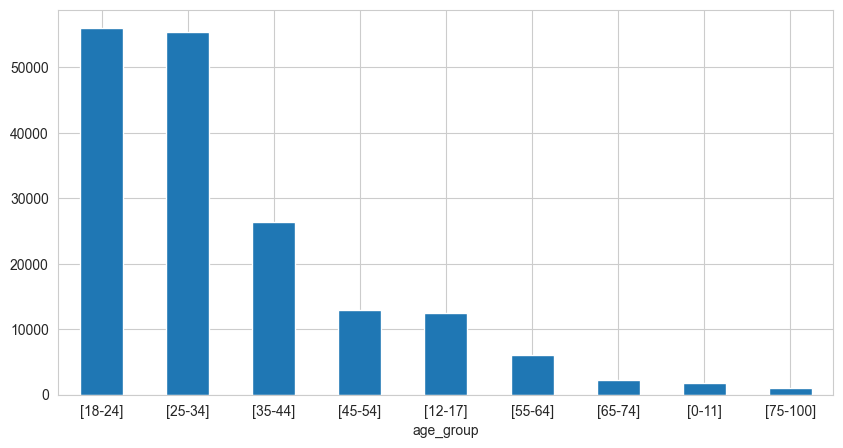

In [10]:
# We want to discretize the feature avg_age_participants in the following classes: [0-11], [12-17], [18-24], [25-34], [35-44], [45-54], [55-64], [65-74], [75-100]
# We create a new feature 'age_group' with the corresponding class
def f(x):
    if x <= 11:
        return '[0-11]'
    elif x <= 17:
        return '[12-17]'
    elif x <= 24:
        return '[18-24]'
    elif x <= 34:
        return '[25-34]'
    elif x <= 44:
        return '[35-44]'
    elif x <= 54:
        return '[45-54]'
    elif x <= 64:
        return '[55-64]'
    elif x <= 74:
        return '[65-74]'
    else:
        return '[75-100]'


df_incidents['age_group'] = df_incidents['avg_age_participants'].apply(f)
# histogram of the age_group
plt.figure(figsize=(10, 5))
df_incidents['age_group'].value_counts().plot(kind='bar')
# make the plot more readable
plt.xticks(rotation=0)

### Incidents' characteristics

<Axes: xlabel='incident_characteristics1'>

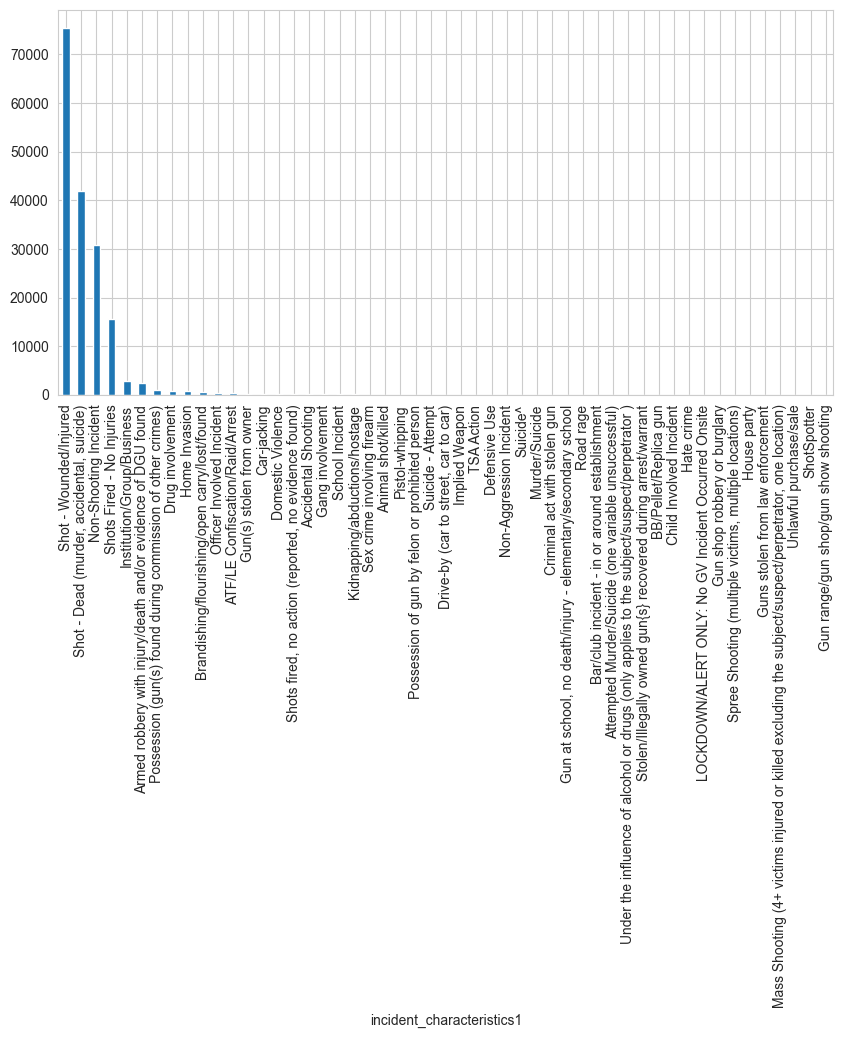

In [11]:
# Let's see the distribution of the feature characteristics1
plt.figure(figsize=(10, 5))
df_incidents['incident_characteristics1'].value_counts().plot(kind='bar')

We decide to reduce to just 5 labels: the 4 most common characteristics, i.e., 'Shoot-Wounded/Injured', 'Shoot-Dead(murder, accidental, suicide)', 'Non-Shooting Incident', 'Shots Fired-No Injuries', and we set the others to 'Other'.

In [181]:
print(df_incidents['incident_characteristics1'].value_counts().head(4))

Shot - Wounded/Injured                       85424
Shot - Dead (murder, accidental, suicide)    44098
Non-Shooting Incident                        32637
Shots Fired - No Injuries                    17957
Name: incident_characteristics1, dtype: Int64


In [12]:
# Define the four most common values
common_values = ['Shot - Wounded/Injured', 'Shot - Dead (murder, accidental, suicide)', 'Non-Shooting Incident', 'Shots Fired - No Injuries']

def change_uncommon_values(characteristic):
    if characteristic not in common_values:
        characteristic='Other'
    return characteristic

df_incidents['incident_characteristics1']=df_incidents['incident_characteristics1'].apply(change_uncommon_values)

<Axes: xlabel='incident_characteristics1'>

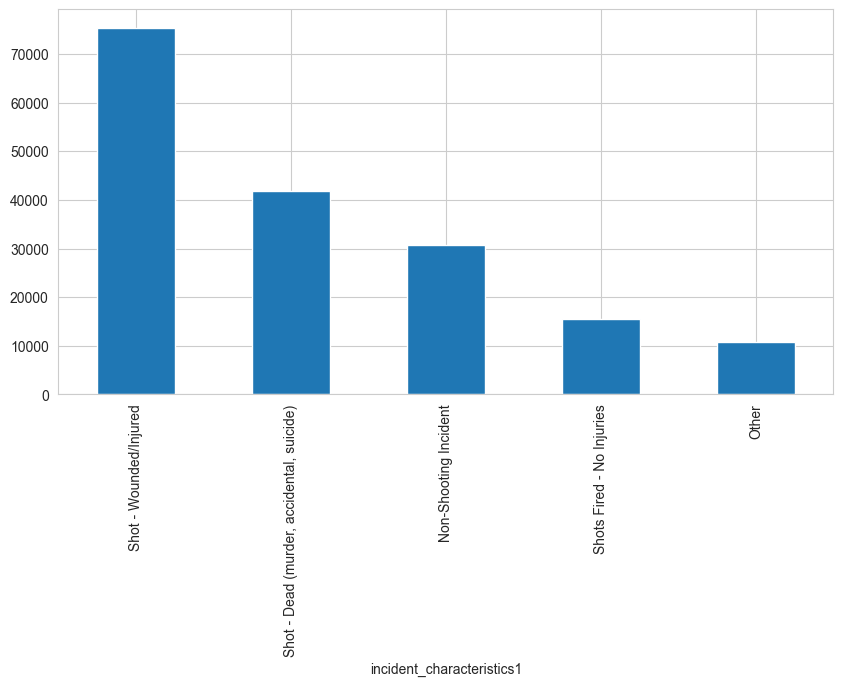

In [13]:
plt.figure(figsize=(10, 5))
df_incidents['incident_characteristics1'].value_counts().plot(kind='bar')

## Joining datasets
We also decided to join the incidents and poverty datasets in order to have, associated to each incident, the poverty percentage of that state in the year the incident occurred. Then, we joined the incidents and elections datasets, so that for each incident we have the data related to the election happened in the year, state, and congressional district of the incident. Notice that we have the election data just for the even years.


In [68]:
# We start by creating a temporary column 'year' in df_incidents
df_incidents['year']=df_incidents['date'].dt.year

In [15]:
# Then, we join the datasets
df_incidents = pd.merge(df_incidents, df_poverty, on=['state', 'year'], how='left')

In [16]:
df_incidents.head()

,date,state,city_or_county,address,latitude,longitude,congressional_district,avg_age_participants,n_participants_child,n_participants_teen,...,n_killed,n_injured,n_arrested,n_unharmed,n_participants,incident_characteristics1,year,age_group,povertyPercentage,population
0,2015-05-02,Indiana,Indianapolis,Lafayette Road and Pike Plaza,39.8322,-86.2492,7.0,19.0,0.0,0.0,...,0,1,0.0,0.0,1.0,Shot - Wounded/Injured,2015,[18-24],12.3,6608422
1,2017-04-03,Pennsylvania,Kane,5647 US 6,41.6645,-78.7856,5.0,62.0,0.0,0.0,...,1,0,0.0,0.0,1.0,"Shot - Dead (murder, accidental, suicide)",2017,[55-64],10.5,12787641
2,2016-10-15,District of Columbia,Washington,"1000 block of Bladensburg Road, NE",38.9030,-76.9820,1.0,26.0,0.0,0.0,...,0,1,0.0,0.0,2.0,Shot - Wounded/Injured,2016,[25-34],14.9,685815
3,2014-01-18,North Carolina,Wayne County,4700 block of U.S. Highway 70 East,35.1847,-77.9527,13.0,65.0,0.0,0.0,...,0,1,0.0,0.0,1.0,Shot - Wounded/Injured,2014,[65-74],15.3,9932887
4,2018-01-25,Louisiana,Zachary,18733 Samuels Rd,30.6069,-91.2270,6.0,26.0,0.0,0.0,...,2,1,2.0,0.0,5.0,Shot - Wounded/Injured,2018,[25-34],17.5,4659690


Since the 'congressional_district' feature in the elections dataset has value 0 if there is a single district in the state, and in the incidents dataset it has value 1 in such case, we have to adjust the values in the elections dataset before joining.

In [17]:
df_elections['congressional_district'] = df_elections['congressional_district'].replace(0, 1)

In [18]:
# We uniform the data types of the columns to be joined
df_incidents['year'] = df_incidents['year'].astype('float64')
df_incidents['congressional_district']=df_incidents['congressional_district'].astype('float64')

In [19]:
# We convert the state columns of the elections dataset to lowercase
df_incidents['state'] = df_incidents['state'].str.lower() 
df_elections['state'] = df_elections['state'].str.lower()

In [20]:
# We join the datasets
df_incidents = pd.merge(df_incidents, df_elections, on=['state', 'congressional_district', 'year'], how='left')
df_incidents.head()

,date,state,city_or_county,address,latitude,longitude,congressional_district,avg_age_participants,n_participants_child,n_participants_teen,...,n_unharmed,n_participants,incident_characteristics1,year,age_group,povertyPercentage,population,party,candidatevotes,totalvotes
0,2015-05-02,indiana,Indianapolis,Lafayette Road and Pike Plaza,39.8322,-86.2492,7.0,19.0,0.0,0.0,...,0.0,1.0,Shot - Wounded/Injured,2015.0,[18-24],12.3,6608422,NaN,NaN,NaN
1,2017-04-03,pennsylvania,Kane,5647 US 6,41.6645,-78.7856,5.0,62.0,0.0,0.0,...,0.0,1.0,"Shot - Dead (murder, accidental, suicide)",2017.0,[55-64],10.5,12787641,NaN,NaN,NaN
2,2016-10-15,district of columbia,Washington,"1000 block of Bladensburg Road, NE",38.9030,-76.9820,1.0,26.0,0.0,0.0,...,0.0,2.0,Shot - Wounded/Injured,2016.0,[25-34],14.9,685815,NaN,NaN,NaN
3,2014-01-18,north carolina,Wayne County,4700 block of U.S. Highway 70 East,35.1847,-77.9527,13.0,65.0,0.0,0.0,...,0.0,1.0,Shot - Wounded/Injured,2014.0,[65-74],15.3,9932887,REPUBLICAN,153991.0,268709.0
4,2018-01-25,louisiana,Zachary,18733 Samuels Rd,30.6069,-91.2270,6.0,26.0,0.0,0.0,...,0.0,5.0,Shot - Wounded/Injured,2018.0,[25-34],17.5,4659690,REPUBLICAN,186553.0,268525.0


In [192]:
df_incidents.describe()

,latitude,longitude,congressional_district,avg_age_participants,n_participants_child,n_participants_teen,n_participants_adult,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,povertyPercentage,candidatevotes,totalvotes
count,197202.000000,197202.000000,187262.000000,197202.000000,197202.000000,197202.000000,197202.000000,197202.000000,197202.000000,197202.000000,197202.000000,197202.000000,197202.000000,197202.000000,174421.000000,81361.000000,81361.000000
mean,37.534232,-89.228201,8.052953,30.186324,0.023134,0.129664,1.551429,1.520816,0.216509,0.300352,0.544751,0.484488,0.487835,1.838901,12.576461,169361.611214,251584.214120
std,5.103005,14.286898,8.538928,12.370068,0.186736,0.455685,1.083861,1.002613,0.494860,0.557613,0.747725,0.844305,0.922462,1.184864,2.752935,52786.836463,75003.986254
min,19.111400,-171.429000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.400000,30208.000000,46143.000000
25%,33.905800,-93.622300,2.000000,21.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.800000,130752.000000,196299.000000
50%,38.547300,-86.239950,5.000000,27.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.300000,169976.000000,255608.000000
75%,41.437550,-79.993700,10.000000,36.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,14.100000,207515.000000,309645.000000
max,71.336800,-67.271100,53.000000,100.000000,11.000000,27.000000,103.000000,61.000000,23.000000,50.000000,53.000000,63.000000,28.000000,103.000000,21.800000,329800.000000,507831.000000


## Definition of new indicators

### Severity of the incident
We start considering the ratio of killed and injured participants in the incidents with respect to the sum of killed, injured and unharmed participants (we didn't consider the total number of participants since in some cases there is a mismatch in these values). Then, we define the _severity_ of the incidents as the weighted mean of the ratios just defined. We assign to `ratio_killed` the weight 0.7, and to `ratio_injured` the weight 0.3.

In [22]:
total = df_incidents['n_killed'] + df_incidents['n_injured'] + df_incidents['n_unharmed']

df_incidents['ratio_killed'] = df_incidents['n_killed']/total*100
df_incidents['ratio_injured'] = df_incidents['n_injured']/total*100
df_incidents['ratio_unharmed'] = df_incidents['n_unharmed']/total*100

In [23]:
df_incidents['severity'] = 0.7*df_incidents['ratio_killed'] + 0.3*df_incidents['ratio_injured']

In [24]:
df_incidents['severity'].describe()

count    140315.000000
mean         34.420391
std          23.699626
min           0.000000
25%          15.000000
50%          30.000000
75%          56.666667
max          70.000000
Name: severity, dtype: float64

In [25]:
# See how many missing values there are in the incidents dataset
df_incidents.isnull().sum()

date                             0
state                            0
city_or_county                   0
address                      12278
latitude                         0
longitude                        0
congressional_district        9914
avg_age_participants             0
n_participants_child             0
n_participants_teen              0
n_participants_adult             0
n_males                          0
n_females                        0
n_killed                         0
n_injured                        0
n_arrested                       0
n_unharmed                       0
n_participants                   0
incident_characteristics1        0
age_group                        0
povertyPercentage                0
population                       0
party                        92291
candidatevotes               93060
totalvotes                   93060
ratio_killed                 34106
ratio_injured                34106
ratio_unharmed               34106
severity            

In [26]:
# See how many instances have total = 0 (therefore we have to divide by 0 which gives a nan)
df_incidents[df_incidents['n_killed'] + df_incidents['n_injured'] + df_incidents['n_unharmed'] == 0].shape

(34106, 29)

We notice that the number of missing values of 'severity' are exactly the same as the number of instances with total = 0. This means that the missing values are due to the division by 0. We decide to fill the missing values with 0.

In [27]:
# Fill nan values with 0
df_incidents['severity'].fillna(0, inplace=True)

Text(0.5, 1.0, 'Distribution of the severity')

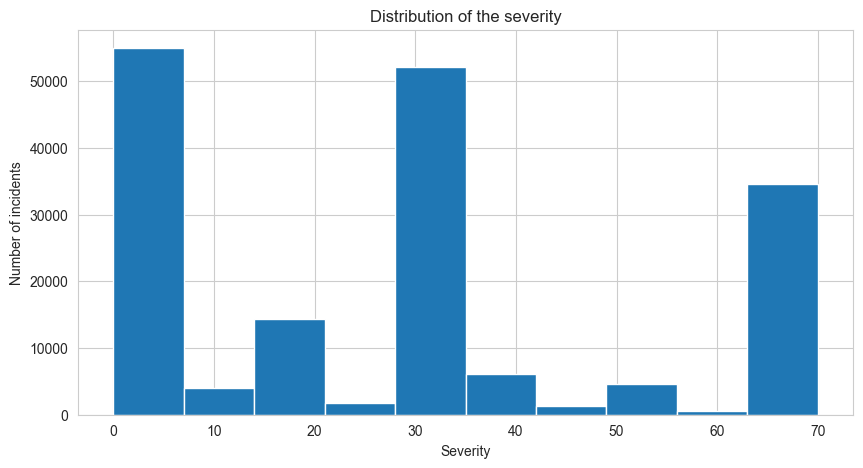

In [28]:
# Let's see the distribution of the severity
plt.figure(figsize=(10,5))
plt.hist(df_incidents['severity'], bins=10)
plt.xlabel('Severity')
plt.ylabel('Number of incidents')
plt.title('Distribution of the severity')

Looking at the histogram it is clear that there are 3 main peaks: one around 0, one around 30, and one around 70. We decide to define a categorical feature with values 'low', 'medium', 'high' based on the severity. We assign 'low' to those with severity <=20, 'medium' to those with severity <=40, and 'high' to the others.

Text(0.5, 1.0, 'Distribution of the severity')

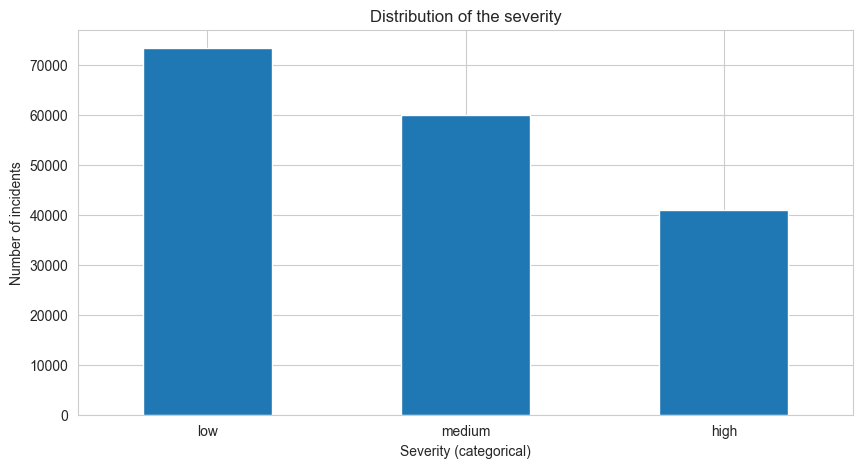

In [29]:
# Assign low to those with severity <=20, medium to those with severity <=40, high to the others
def f(x):
    if x<=20:
        return 'low'
    elif x<=40:
        return 'medium'
    else:
        return 'high'
df_incidents['severity_cat'] = df_incidents['severity'].apply(f)
# plot the distribution of the severity_cat
plt.figure(figsize=(10,5))
df_incidents['severity_cat'].value_counts().plot(kind='bar')
# make the plot more readable
plt.xticks(rotation=0)
plt.xlabel('Severity (categorical)')
plt.ylabel('Number of incidents')
plt.title('Distribution of the severity')


In [30]:
# We drop the columns of the ratios
df_incidents.drop(['ratio_killed', 'ratio_injured', 'ratio_unharmed'], axis=1, inplace=True)

In [31]:
# Columns of the incidents dataset
df_incidents.columns

Index(['date', 'state', 'city_or_county', 'address', 'latitude', 'longitude',
       'congressional_district', 'avg_age_participants',
       'n_participants_child', 'n_participants_teen', 'n_participants_adult',
       'n_males', 'n_females', 'n_killed', 'n_injured', 'n_arrested',
       'n_unharmed', 'n_participants', 'incident_characteristics1',
       'age_group', 'povertyPercentage', 'population', 'party',
       'candidatevotes', 'totalvotes', 'severity', 'severity_cat'],
      dtype='object')

### Involvement of minors
We define a similar metric for children and teen involvement: `severity_minor` will be the weighted mean of the ratios of children and teens involved in the incidents with respect to the sum of children, teens and adults involved in the incidents. We assign to `ratio_child` the weight 0.7, and to `ratio_teen` the weight 0.3.

<Axes: ylabel='Frequency'>

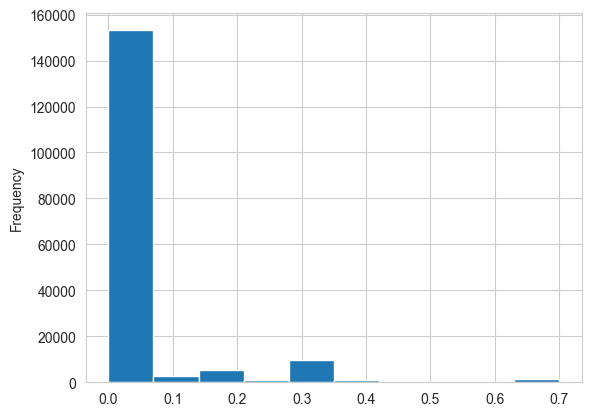

In [32]:
total = df_incidents['n_participants_child'] + df_incidents['n_participants_teen'] + df_incidents['n_participants_adult']
df_incidents['ratio_child'] = df_incidents['n_participants_child']/total
df_incidents['ratio_teen'] = df_incidents['n_participants_teen']/total

df_incidents['severity_minor'] = 0.7*df_incidents['ratio_child'] + 0.3*df_incidents['ratio_teen']
df_incidents.columns.drop(['ratio_child', 'ratio_teen'])
df_incidents['severity_minor'].plot(kind='hist', bins=10)

### Injured and killed in a given place and time
We investigate how many injured and killed people have been involved w.r.t the total injured and killed people in the same congressional district (and state) in a month.

In [33]:
# We group the incidents by state, congressional district, year-month, and we sum the number of killed people
df_incidents['year_month'] = df_incidents.date.dt.strftime('%y-%m')
df_incidents.year_month.isnull().sum()
tot_killed = df_incidents.groupby(['state', 'congressional_district', 'year_month'])['n_killed'].sum()

# Convert the Series to a DataFrame and reset the index
tot_killed_df = tot_killed.reset_index()

# Rename the 'n_killed' column to 'total_killed_district'
tot_killed_df = tot_killed_df.rename(columns={'n_killed': 'total_killed_district'})

# Print the resulting DataFrame
print(tot_killed_df)

         state  congressional_district year_month  total_killed_district
0      alabama                     1.0      14-01                      3
1      alabama                     1.0      14-02                      5
2      alabama                     1.0      14-03                      3
3      alabama                     1.0      14-04                      3
4      alabama                     1.0      14-05                      7
...        ...                     ...        ...                    ...
21112  wyoming                     1.0      17-05                      0
21113  wyoming                     1.0      17-06                      0
21114  wyoming                     1.0      17-07                      0
21115  wyoming                     1.0      17-08                      3
21116  wyoming                     1.0      17-09                      1

[21117 rows x 4 columns]


In [34]:
# We do the same for the injured
tot_injured = df_incidents.groupby(['state', 'congressional_district', 'year_month'])['n_injured'].sum()

# Convert the Series to a DataFrame and reset the index
tot_injured_df = tot_injured.reset_index()

# Rename the 'n_killed' column to 'total_injured_district'
tot_injured_df = tot_injured_df.rename(columns={'n_injured': 'total_injured_district'})

# Print the resulting DataFrame
print(tot_injured_df)

         state  congressional_district year_month  total_injured_district
0      alabama                     1.0      14-01                       2
1      alabama                     1.0      14-02                       3
2      alabama                     1.0      14-03                       1
3      alabama                     1.0      14-04                       3
4      alabama                     1.0      14-05                       3
...        ...                     ...        ...                     ...
21112  wyoming                     1.0      17-05                       2
21113  wyoming                     1.0      17-06                       2
21114  wyoming                     1.0      17-07                       0
21115  wyoming                     1.0      17-08                       2
21116  wyoming                     1.0      17-09                       1

[21117 rows x 4 columns]


In [35]:
# We join the 'total_killed_district' and 'total_injured_district' columns to the incidents dataset
df_incidents = pd.merge( df_incidents, tot_killed_df, on=['state', 'congressional_district', 'year_month'])
df_incidents = pd.merge(df_incidents, tot_injured_df, on=['state', 'congressional_district', 'year_month'])

We define the features 'killed_by_district' and 'injured_by_district' as the ratio of killed and injured people in the incident w.r.t. the total killed and injured people in the same congressional district (and state) in the same year-month. We impose that these features have value 0 if 'total_killed_district' or 'total_injured_district' is 0.

In [36]:
# We distinguish between the case with total_killed_district = 0, and total_killed_district != 0
def f(x, y):
    if y!=0:
        return x/y
    else:
        return 0
df_incidents['killed_by_district'] = df_incidents.apply(lambda row: f(row['n_killed'], row['total_killed_district']), axis=1)

df_incidents['injured_by_district'] = df_incidents.apply(lambda row: f(row['n_injured'], row['total_injured_district']), axis=1)

# We then drop the columns 'total_killed_district', 'total_injured_district'
df_incidents.drop(['total_killed_district', 'total_injured_district'], axis=1, inplace=True)

Text(0.5, 0, 'Ratio of killed people in the incident w.r.t. the total killed people in the same district in the same year-month')

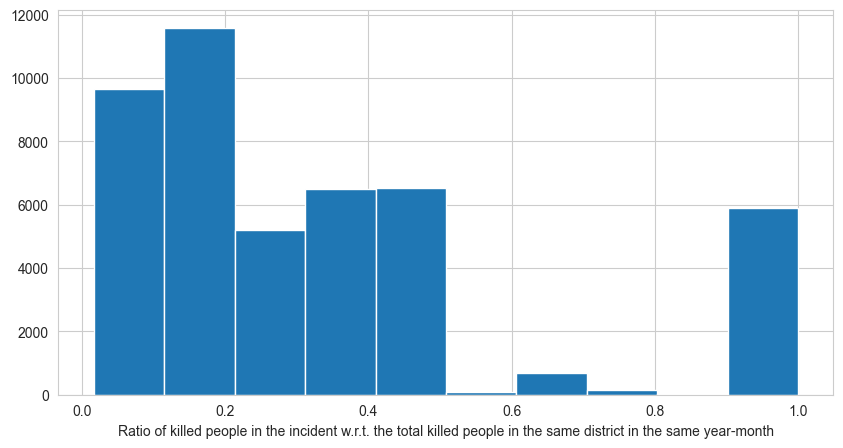

In [37]:
# Let's see the distribution of the feature 'killed_by_district'
plt.figure(figsize=(10, 5))
plt.hist(df_incidents.killed_by_district[df_incidents['killed_by_district']!=0], bins=10)
#title
plt.xlabel('Ratio of killed people in the incident w.r.t. the total killed people in the same district in the same year-month')

Text(0.5, 0, 'Ratio of injured people in the incident w.r.t. the total injured people in the same district in the same year-month')

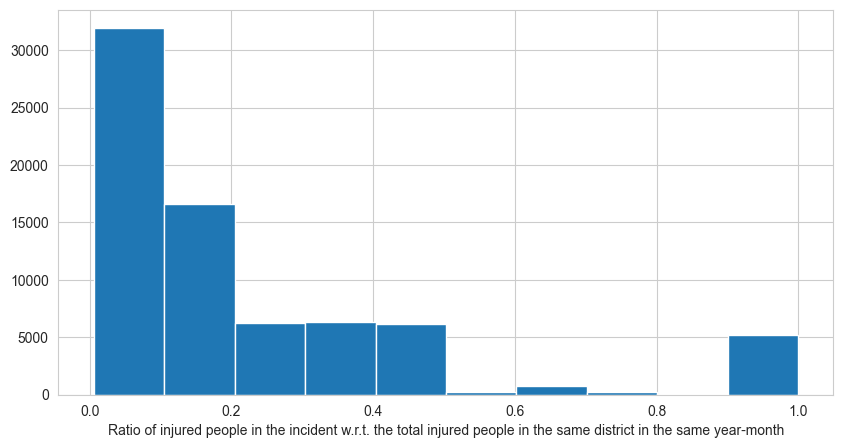

In [38]:
plt.figure(figsize=(10, 5))
plt.hist(df_incidents['injured_by_district'][df_incidents['injured_by_district']!=0], bins=10)
#title
plt.xlabel('Ratio of injured people in the incident w.r.t. the total injured people in the same district in the same year-month')

### Ratio of features
We consider the ratio of females, arrested, and unharmed people w.r.t. the total number of participants in the incident. We recall that in the actual dataset 'n_participants' is greater than 0, so these features are well-defined.


In [39]:
# Number of instances with n_participants = 0
df_incidents[df_incidents['n_participants']==0].shape

(0, 33)

In [40]:
df_incidents['female_ratio'] = df_incidents['n_females']/df_incidents['n_participants']*100
df_incidents['arrested_ratio'] = df_incidents['n_arrested']/df_incidents['n_participants']*100
df_incidents['unharmed_ratio'] = df_incidents['n_unharmed']/df_incidents['n_participants']*100

### Left/Right wing voters in the districts
We define the new indicator `right_or_left` as follows:
- We calculate the ratio of voters of the party of the candidate who won the election in the district w.r.t. the total number of voters in the district.
- If the winner is a Republican, we assign this ratio to `right_or_left`.
- If the winner is a Democrat, we assign 1 - the ratio to `right_or_left`.

We recall that in the actual dataset 'totalvotes' is greater than 0, so this feature is well-defined.

Moreover, an example to better understand the definition of the feature: if the winning party is Democrat and the democratic candidate won with 60% of the votes, then `right_or_left` will be 0.4.


In [41]:
# Number of instances with totalvotes = 0
df_incidents[df_incidents['totalvotes']==0].shape

(0, 36)

In [42]:
df_incidents['ratio_of_voters']= df_incidents['candidatevotes']/df_incidents['totalvotes']

# Definition of the new feature
def right_or_left(row):
    if row['party'] == 'REPUBLICAN':
        return row['ratio_of_voters']
    else:
        return 1-row['ratio_of_voters']
df_incidents['right_or_left'] = df_incidents.apply(right_or_left, axis=1)

<Axes: ylabel='Frequency'>

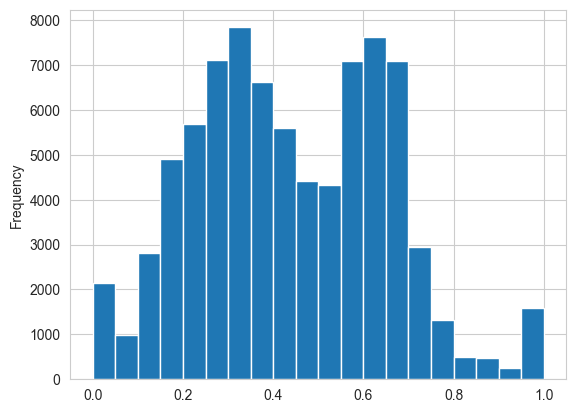

In [43]:
df_incidents['right_or_left'].plot(kind='hist', bins=20)

As we could imagine, the distribution of the feature is bimodal, since the winning party is either Republican or Democrat.

### Distance from the means
We define others indicators by computing the distance of a certain feature from the mean of that feature.

In [44]:
mean_killed = df_incidents['n_killed'].mean()
mean_injured = df_incidents['n_injured'].mean()
mean_participants = df_incidents['n_participants'].mean()
mean_participants_child = df_incidents['n_participants_child'].mean()
mean_participants_teen = df_incidents['n_participants_teen'].mean()
mean_participants_adult = df_incidents['n_participants_adult'].mean()
mean_females = df_incidents['n_females'].mean()
mean_males = df_incidents['n_males'].mean()

In [45]:
df_incidents['distance_mean_killed'] = (df_incidents['n_killed']-mean_killed)
df_incidents['distance_mean_injured'] = (df_incidents['n_injured']-mean_injured)
df_incidents['distance_mean_participants'] = (df_incidents['n_participants']-mean_participants)
df_incidents['distance_mean_participants_child'] = (df_incidents['n_participants_child']-mean_participants_child)
df_incidents['distance_mean_participants_teen'] = (df_incidents['n_participants_teen']-mean_participants_teen)
df_incidents['distance_mean_participants_adult'] = (df_incidents['n_participants_adult']-mean_participants_adult)
df_incidents['distance_mean_females'] = df_incidents['n_females'] - mean_females
df_incidents['distance_mean_males'] = df_incidents['n_males'] - mean_males

<Axes: ylabel='Frequency'>

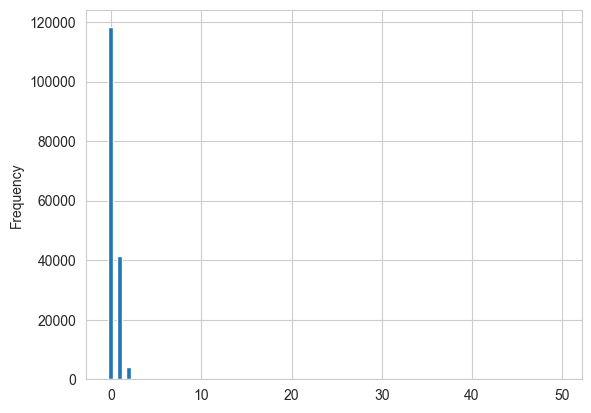

In [48]:
# Let's see the distribution of some of the new features
df_incidents['distance_mean_killed'].plot(kind='hist', bins=100)

<Axes: ylabel='Frequency'>

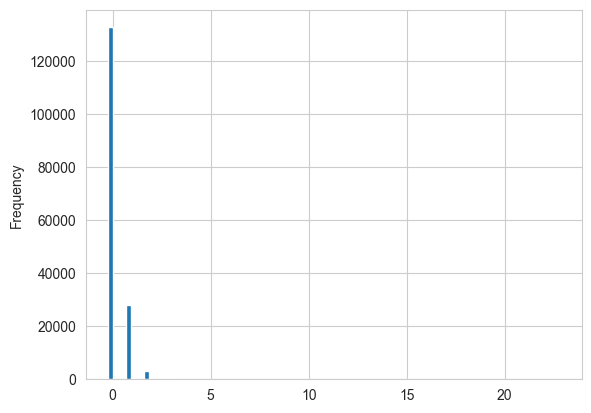

In [49]:
df_incidents['distance_mean_females'].plot(kind='hist', bins=100)

### Distance from the mean of the state
In a similar way, we can consider how far a certain feature is from the mean of that feature in the state where the incident occurred.

In [50]:
# We group the incidents by state and we compute the mean of the features
mean_killed_state = df_incidents.groupby(['state'])['n_killed'].mean()
mean_injured_state = df_incidents.groupby(['state'])['n_injured'].mean()
mean_participants_state = df_incidents.groupby(['state'])['n_participants'].mean()
mean_participants_child_state = df_incidents.groupby(['state'])['n_participants_child'].mean()
mean_participants_teen_state = df_incidents.groupby(['state'])['n_participants_teen'].mean()
mean_females_state = df_incidents.groupby(['state'])['n_females'].mean()

df_incidents['dfm_state_killed'] = df_incidents.apply(lambda row: row['n_killed']-mean_killed_state[row['state']], axis=1)

df_incidents['dfm_state_injured'] = df_incidents.apply(lambda row: row['n_injured']-mean_injured_state[row['state']], axis=1)

df_incidents['dfm_state_participants'] = df_incidents.apply(lambda row: row['n_participants']-mean_participants_state[row['state']], axis=1)

df_incidents['dfm_state_participants_child'] = df_incidents.apply(lambda row: row['n_participants_child']-mean_participants_child_state[row['state']], axis=1)

df_incidents['dfm_state_participants_teen'] = df_incidents.apply(lambda row: row['n_participants_teen']-mean_participants_teen_state[row['state']], axis=1)

df_incidents['dfm_state_females'] = df_incidents.apply(lambda row: row['n_females']-mean_females_state[row['state']], axis=1)

<Axes: ylabel='Frequency'>

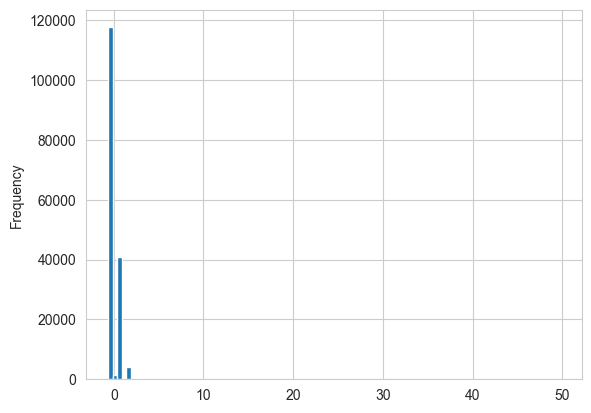

In [51]:
# Let's see the distribution of some of the new features
df_incidents['dfm_state_killed'].plot(kind='hist', bins=100)

<Axes: ylabel='Frequency'>

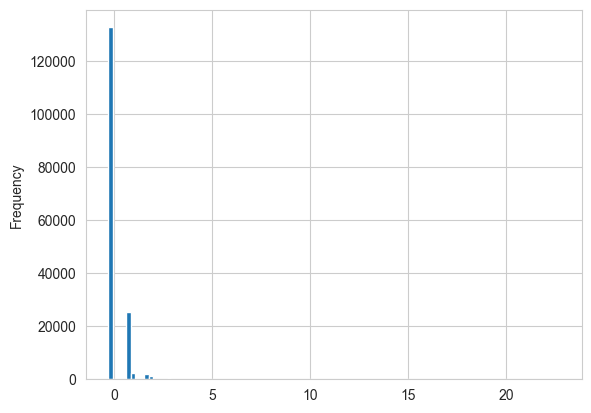

In [52]:
df_incidents['dfm_state_females'].plot(kind='hist', bins=100)

### Distance from the mean of the district
Going even more specifically, we can consider how far a certain feature is from the mean of that feature in the district where the incident occurred.

In [53]:
# We group the incidents by state and congressional district, and we compute the mean of the features
mean_killed_district = df_incidents.groupby(['state', 'congressional_district'])['n_killed'].mean()
mean_injured_district = df_incidents.groupby(['state', 'congressional_district'])['n_injured'].mean()
mean_participants_district = df_incidents.groupby(['state', 'congressional_district'])['n_participants'].mean()
mean_participants_child_district = df_incidents.groupby(['state', 'congressional_district'])['n_participants_child'].mean()
mean_participants_teen_district = df_incidents.groupby(['state', 'congressional_district'])['n_participants_teen'].mean()
mean_females_district = df_incidents.groupby(['state', 'congressional_district'])['n_females'].mean()

df_incidents['dfm_district_killed'] = df_incidents.apply(lambda row: row['n_killed']-mean_killed_district[row['state'], row['congressional_district']], axis=1)
df_incidents['dfm_district_injured'] = df_incidents.apply(lambda row: row['n_injured']-mean_injured_district[row['state'], row['congressional_district']], axis=1)
df_incidents['dfm_district_participants'] = df_incidents.apply(lambda row: row['n_participants']-mean_participants_district[row['state'], row['congressional_district']], axis=1)
df_incidents['dfm_district_child'] = df_incidents.apply(lambda row: row['n_participants_child']-mean_participants_child_district[row['state'], row['congressional_district']], axis=1)
df_incidents['dfm_district_teen'] = df_incidents.apply(lambda row: row['n_participants_teen']-mean_participants_teen_district[row['state'], row['congressional_district']], axis=1)
df_incidents['dfm_district_females'] = df_incidents.apply(lambda row: row['n_females']-mean_females_district[row['state'], row['congressional_district']], axis=1)

<Axes: ylabel='Frequency'>

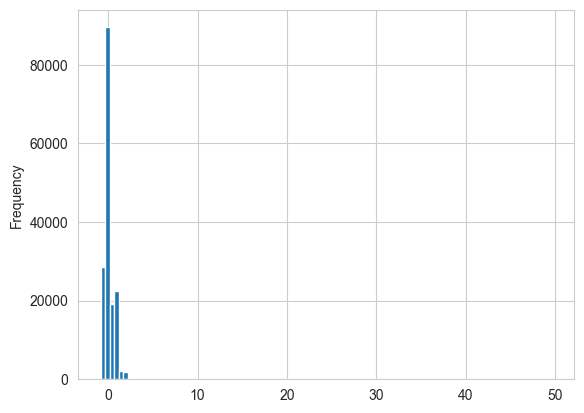

In [54]:
# Let's see the distribution of some of the new features
df_incidents['dfm_district_killed'].plot(kind='hist', bins=100)

<Axes: ylabel='Frequency'>

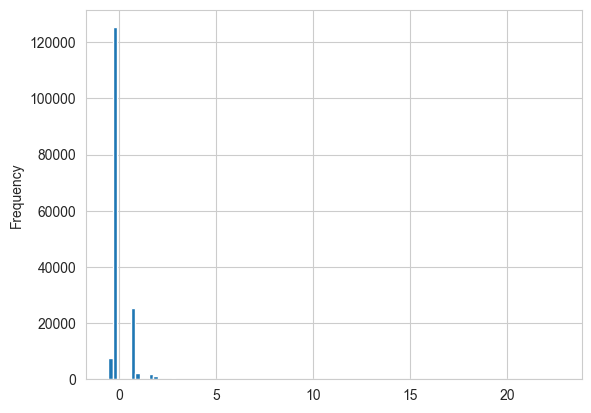

In [55]:
df_incidents['dfm_district_females'].plot(kind='hist', bins=100)

<Axes: ylabel='Frequency'>

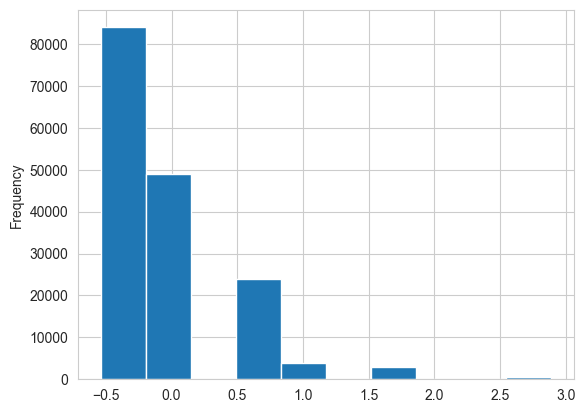

In [56]:
# Focusing on the values <= 3:
df_incidents['dfm_district_females'][df_incidents['dfm_district_females']<=3].plot(kind='hist', bins=10)

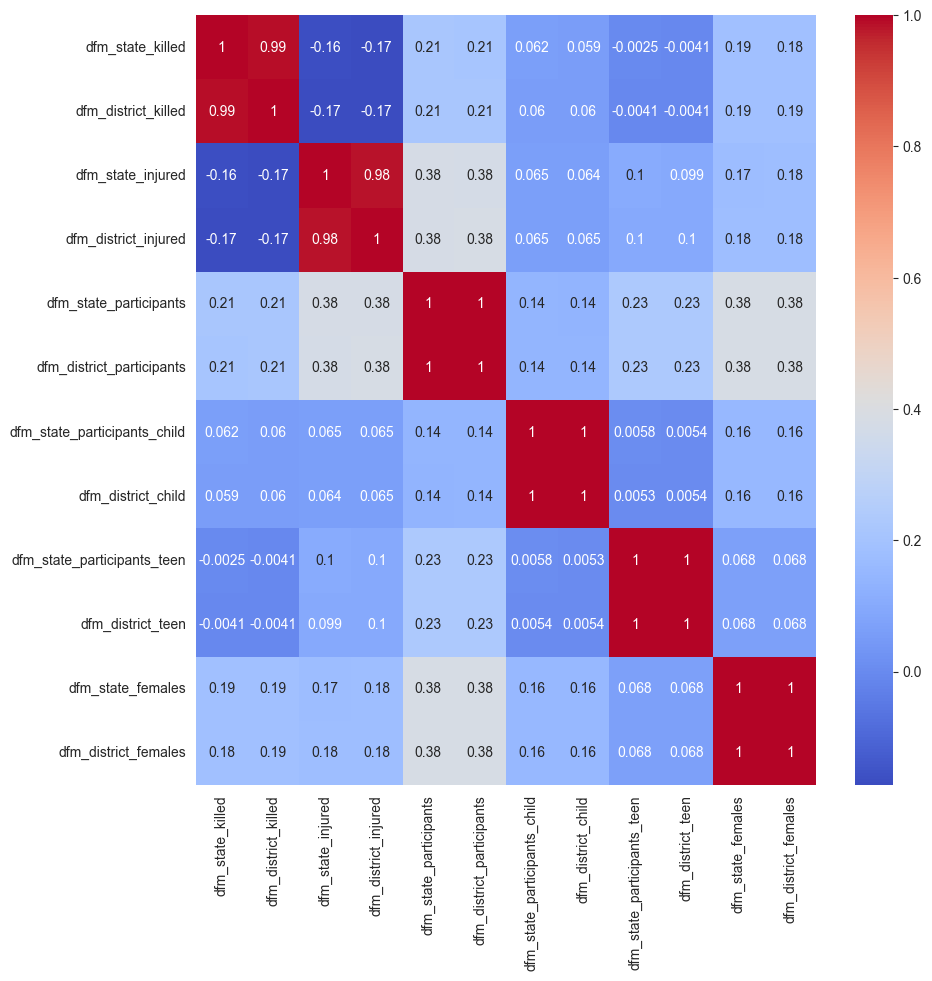

In [83]:
# Let's see the heatmap of the distances from the means of the state, and from the mean of the district
plt.figure(figsize=(10, 10))
sns.heatmap(df_incidents[
                ['dfm_state_killed', 'dfm_district_killed',  'dfm_state_injured', 'dfm_district_injured', 'dfm_state_participants', 'dfm_district_participants', 'dfm_state_participants_child', 'dfm_district_child', 'dfm_state_participants_teen', 'dfm_district_teen', 'dfm_state_females', 'dfm_district_females']].corr(), annot=True, cmap='coolwarm')
plt.show()

The heatmap shows that the distances from the means of the state and from the mean of the district are highly correlated. We have to decide which ones to keep, and in order to do that we consider the entropy of each feature.

In [86]:
# Entropy of each feature
from scipy.stats import entropy

columns = ['dfm_state_killed', 'dfm_state_injured', 'dfm_state_participants', 'dfm_state_participants_child',
           'dfm_state_participants_teen', 'dfm_state_females', 'dfm_district_killed', 'dfm_district_injured',
           'dfm_district_participants', 'dfm_district_child', 'dfm_district_teen', 'dfm_district_females']
for col in df_incidents[columns].columns:
    print(col, entropy(df_incidents[col].value_counts(normalize=True)))

dfm_state_killed 4.221448568341044
dfm_state_injured 4.4485128178286795
dfm_state_participants 4.759498820271087
dfm_state_participants_child 3.642578651800176
dfm_state_participants_teen 3.947540333587342
dfm_state_females 4.101923191214181
dfm_district_killed 6.3762637634269295
dfm_district_injured 6.592301707911603
dfm_district_participants 6.911949952538205
dfm_district_child 5.6775354661265425
dfm_district_teen 6.087154514285354
dfm_district_females 6.2246618189084995


We choose to drop the distances from the mean of the state, since their entropy is lower.

In [87]:
df_incidents.drop(['dfm_state_killed', 'dfm_state_injured', 'dfm_state_participants', 'dfm_state_participants_child', 'dfm_state_participants_teen', 'dfm_state_females'], axis=1, inplace=True)

### Voters over the total population
We define the feature `voters_over_population` as the ratio of the number of voters in the state w.r.t. the total population in the state for that year.

In [92]:
# Define a new column 'totalvotes_state' as the sum of the votes of each district in the state and year
df_incidents['totalvotes_state'] = 0
for year in df_incidents[df_incidents.year.isin([2014,2016,2018])]:
    for state in df_incidents.state:
        for district in df_incidents[(df_incidents['state']==state) & (df_incidents['year']==year)]['congressional_district']:
            df_incidents[(df_incidents['state']==state) & (df_incidents['year']==year)]['totalvotes_state'] += df_incidents[(df_incidents['state']==state) & (df_incidents['year']==year) & (df_incidents['congressional_district']==district)]['totalvotes']

#TODO: è giusto? Ci mette una vita a runnare

KeyboardInterrupt: 

In [ ]:
df_incidents['voters_over_population'] = df_incidents['totalvotes_state']/df_incidents['population']

### Number of incidents and voters in the district


### Number of incidents and winning party

## Correlation matrix of the features

In [243]:
# print the correlations above a certain threshold
corr_feat=[]
corr_matrix = df_incidents.corr()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8 and (i!=j):
            corr_feat.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
sorted(corr_feat, key=lambda x: abs(x[2]), reverse=True)

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_22888\1256837225.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_incidents.corr()


[('distance_mean_participants', 'n_participants', 1.0000000000000009),
 ('distance_mean_injured', 'n_injured', 1.0000000000000002),
 ('distance_mean_killed', 'n_killed', 1.0),
 ('distance_mean_participants_child', 'n_participants_child', 1.0),
 ('distance_mean_participants_teen', 'n_participants_teen', 1.0),
 ('distance_mean_females', 'n_females', 1.0),
 ('distance_mean_males', 'n_males', 1.0),
 ('distance_mean_participants_adult',
  'n_participants_adult',
  0.9999999999999999),
 ('dfm_district_child', 'n_participants_child', 0.9969036721517847),
 ('dfm_district_child',
  'distance_mean_participants_child',
  0.9969036721517847),
 ('dfm_district_teen', 'n_participants_teen', 0.9955482968533124),
 ('dfm_district_teen', 'distance_mean_participants_teen', 0.995548296853312),
 ('dfm_district_females', 'n_females', 0.9932454618865423),
 ('dfm_district_females', 'distance_mean_females', 0.9932454618865418),
 ('dfm_district_participants', 'n_participants', 0.9901147631396836),
 ('dfm_distric

In [244]:
# drop the old columns used for the computation of the ratios and indicators
#todo sistemare
#df_incidents.drop(['n_killed', 'n_injured', 'n_unharmed','n_females', 'n_males' ], axis=1, inplace=True)


## Save the updated dataset

In [245]:
# Let's see the final datasets
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164507 entries, 0 to 164506
Data columns (total 51 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   date                              164507 non-null  datetime64[ns]
 1   state                             164507 non-null  string        
 2   city_or_county                    164507 non-null  string        
 3   address                           152623 non-null  string        
 4   latitude                          164507 non-null  float64       
 5   longitude                         164507 non-null  float64       
 6   congressional_district            164507 non-null  float64       
 7   avg_age_participants              164507 non-null  float64       
 8   n_participants_child              164507 non-null  float64       
 9   n_participants_teen               164507 non-null  float64       
 10  n_participants_adult            

In [246]:
df_incidents.to_csv('../dataset_preparation/incidents_prepared.csv', index=False)


In [ ]:
#TODO: commentare